In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [69]:
train = pd.read_csv('../input/preprocessed_train.csv', header = 0)
test  = pd.read_csv('../input/preprocessed_test.csv' , header = 0)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title,CategoricalNameLength
0,1,0,3,1,1.0,0,0,0,2,0,1,0
1,2,1,1,0,2.0,0,3,1,2,0,3,2
2,3,1,3,0,1.0,0,1,0,1,1,2,0
3,4,1,1,0,2.0,0,3,0,2,0,3,1
4,5,0,3,1,2.0,0,1,0,1,1,1,0


In [71]:
test.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title,CategoricalNameLength
0,892,3,1,2.0,0,0,2,1,1,1,0
1,893,3,0,2.0,0,0,0,2,0,3,1
2,894,2,1,3.0,0,1,2,1,1,1,0
3,895,3,1,1.0,0,1,0,1,1,1,0
4,896,3,0,1.0,1,1,0,3,0,3,2


In [72]:
train = train.values
test  = test.values

                      Classifier  Accuracy
0           KNeighborsClassifier  0.796667
0                            SVC  0.830000
0         DecisionTreeClassifier  0.796667
0         RandomForestClassifier  0.808889
0             AdaBoostClassifier  0.820000
0     GradientBoostingClassifier  0.820000
0                     GaussianNB  0.791111
0     LinearDiscriminantAnalysis  0.798889
0  QuadraticDiscriminantAnalysis  0.813333
0             LogisticRegression  0.798889


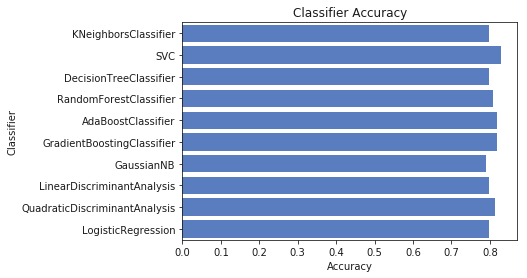

In [73]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[:, 2:]
y = train[:, 1].astype('int32')

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
print(log)

In [74]:
svc = SVC()
svc.fit(X, y)
result = svc.predict(test[:, 1:])

accuracy = round(svc.score(X, y) * 100, 2)
print(accuracy)

Submission = pd.DataFrame({"PassengerId":np.asarray(test[:,0], dtype=int), "Survived": result })
Submission.to_csv('titanic_SVC.csv', index=False)

83.61


In [75]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(test[:, 1:])

acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print(acc_random_forest)

Submission = pd.DataFrame({"PassengerId":np.asarray(test[:,0], dtype=int), "Survived": Y_pred })
Submission.to_csv('titanic_RandomForest.csv', index=False)

90.46
